# Exploratory Data Analysis (EDA) on News Articles


## Introduction

This notebook presents an exploratory data analysis (EDA) of a dataset containing news articles. The analysis focuses on understanding the temporal characteristics of the articles, as well as some basic text statistics.


In [1]:

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '../data/news_store.csv'  # Adjusted file path as per user requirement
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,date,url,source,title,article
0,2023-09-01,https://techcrunch.com/2023/09/01/india-aditya...,TechCrunch,India’s Aditya-L1 solar probe successfully lif...,India has successfully launched its first spac...
1,2023-09-01,https://techcrunch.com/2023/09/01/lenovo-debut...,TechCrunch,Lenovo debuts gaming glasses and portal PC han...,"IFA technically kicks off today in Berlin, but..."
2,2023-09-01,https://techcrunch.com/2023/09/01/tesla-decrea...,TechCrunch,"Tesla decreases the price of FSD beta to $12,000","Tesla just chopped $3,000 off the price of it..."
3,2023-09-01,https://techcrunch.com/2023/09/01/apple-reduce...,TechCrunch,Apple reduces cost of MLS Season Pass to $29 f...,Apple attempts to sway more soccer fans into s...
4,2023-09-01,https://techcrunch.com/2023/09/01/as-a-founder...,TechCrunch,"As a founder, how do you address climate change?",Welcome to Startups Weekly. Sign up here to ge...



## Basic Statistics

Let's start by looking at some basic statistics such as the total number of rows, the number of rows after removing missing values, and the number of missing values in each column.


In [2]:

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with missing values
df_cleaned = df.dropna()

# Convert 'date' to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Basic statistics: Row count and missing values
row_count_before = len(df)
row_count_after = len(df_cleaned)
missing_values = row_count_before - row_count_after

# Count of NaNs in each column
nan_count_per_column = df.isna().sum()

# Formatted print statements for better readability
print(f"Initial number of rows: {row_count_before}")
print(f"Number of rows after removing missing values: {row_count_after}")
print(f"Number of rows with missing values: {missing_values}")
print(f"Number of missing values in each column:\n{nan_count_per_column}")


Initial number of rows: 54137
Number of rows after removing missing values: 53973
Number of rows with missing values: 164
Number of missing values in each column:
date         0
url          0
source       0
title       15
article    164
dtype: int64


/var/folders/n8/v4rz9h_55wnb2bxcf5_2c8mh0000gn/T/ipykernel_15066/4187548642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])


In [3]:

# Add 'day_of_week' column for future use
df_cleaned['day_of_week'] = df_cleaned['date'].dt.day_name()


/var/folders/n8/v4rz9h_55wnb2bxcf5_2c8mh0000gn/T/ipykernel_15066/1067387271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['day_of_week'] = df_cleaned['date'].dt.day_name()



## Time-Series Analysis

Next, let's examine the distribution of articles over various time frames: daily, weekly, monthly, and yearly.


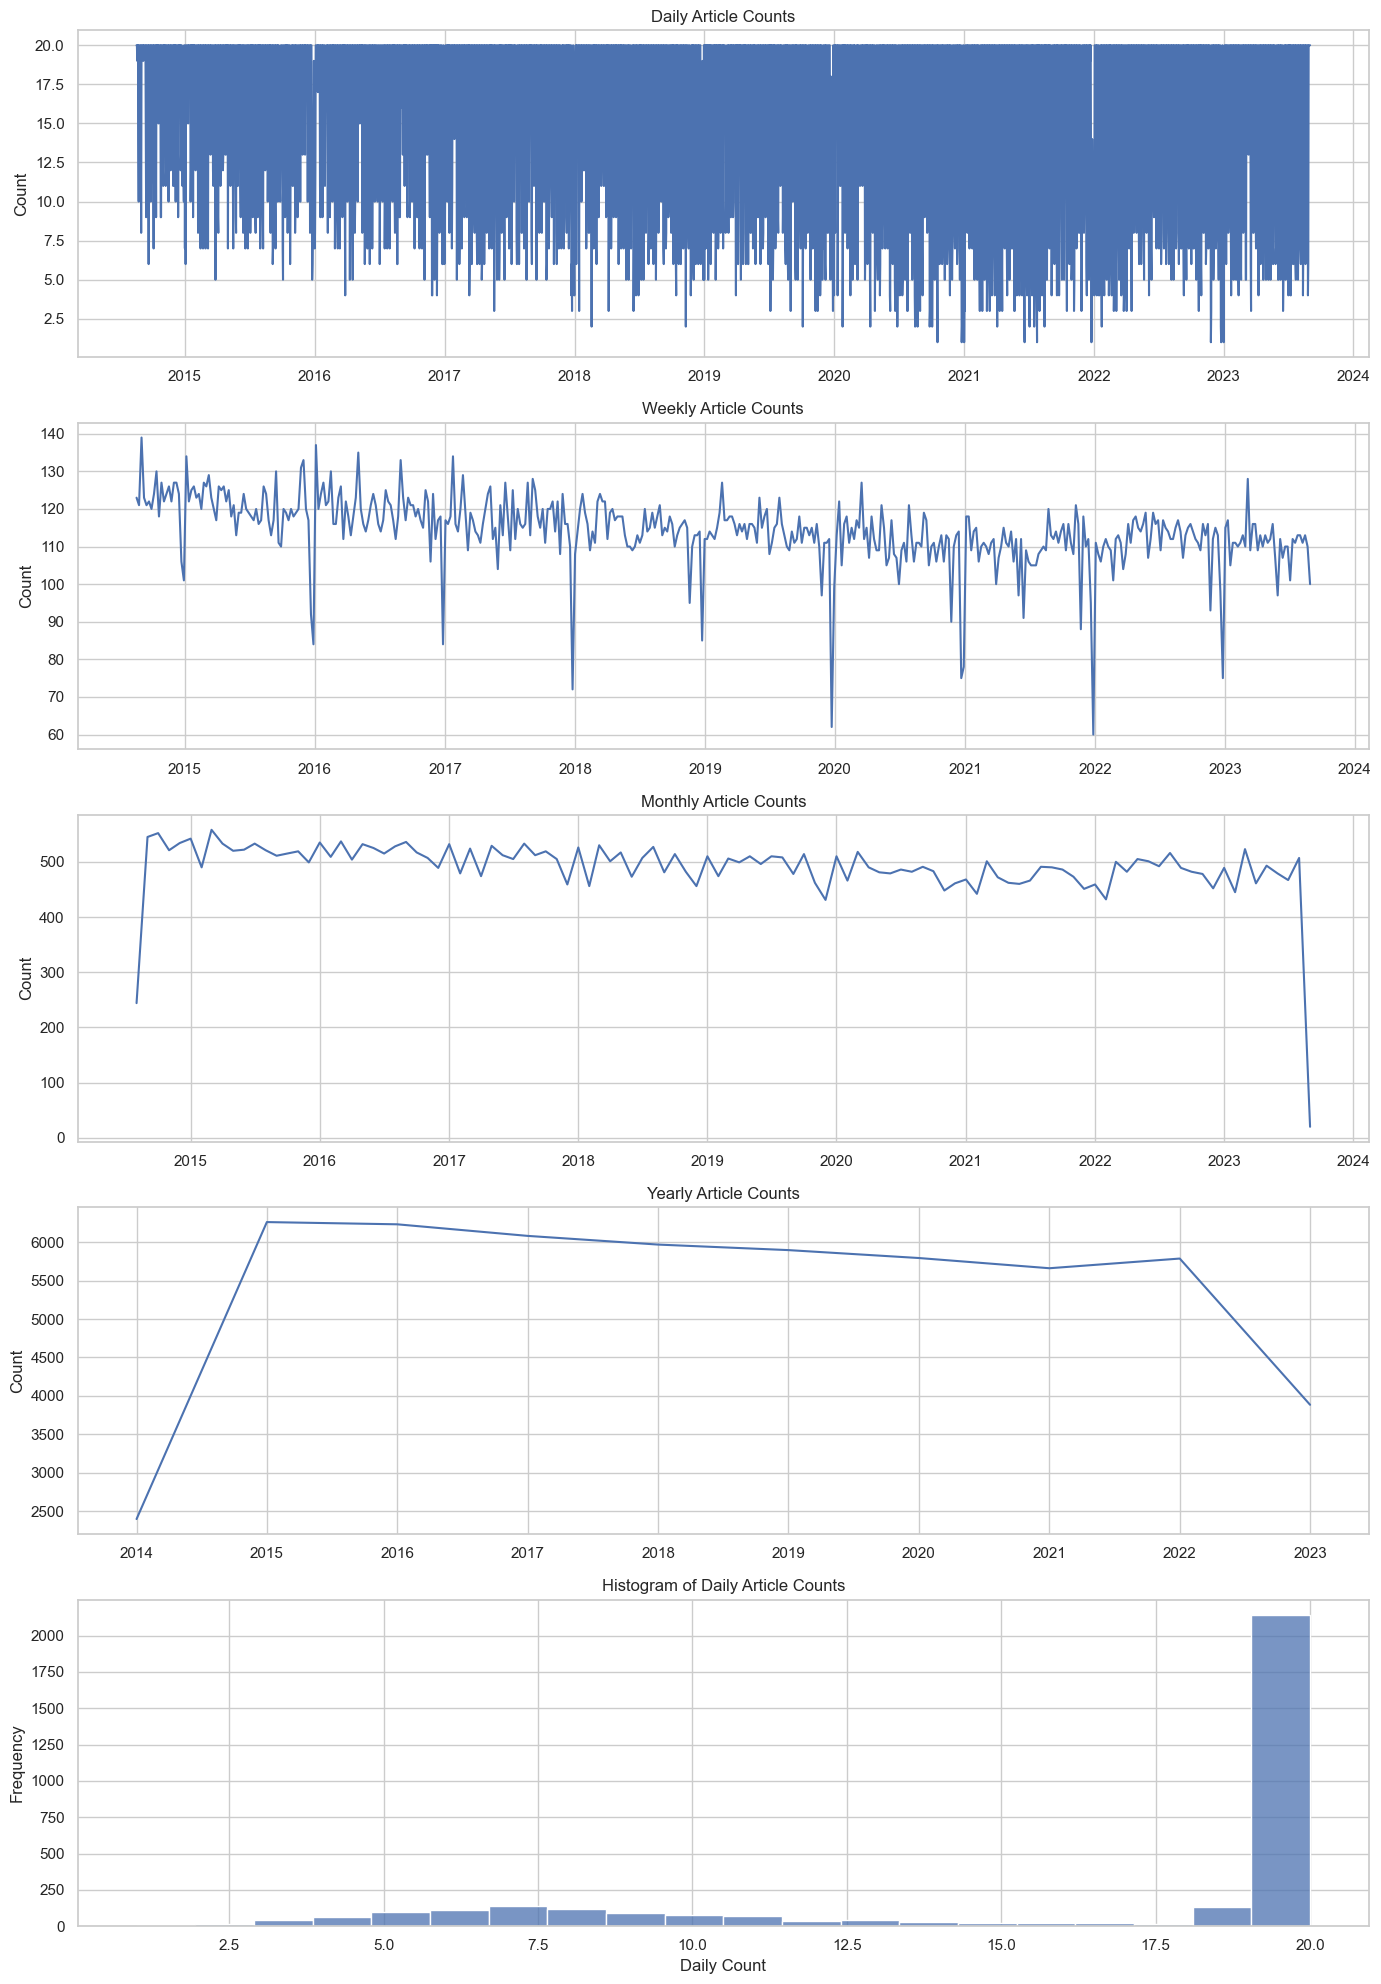

In [4]:

# Time-series analysis
# Group by various time frames
df_daily = df_cleaned.groupby(df_cleaned['date'].dt.date).size().reset_index(name='daily_count')
df_weekly = df_cleaned.groupby(df_cleaned['date'].dt.to_period("W")).size().reset_index(name='weekly_count')
df_monthly = df_cleaned.groupby(df_cleaned['date'].dt.to_period("M")).size().reset_index(name='monthly_count')
df_yearly = df_cleaned.groupby(df_cleaned['date'].dt.to_period("Y")).size().reset_index(name='yearly_count')

# Convert period back to datetime for plotting
df_weekly['date'] = df_weekly['date'].dt.to_timestamp()
df_monthly['date'] = df_monthly['date'].dt.to_timestamp()
df_yearly['date'] = df_yearly['date'].dt.to_timestamp()

# Setting up the plot aesthetics
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(14, 20))

# Daily count
sns.lineplot(x='date', y='daily_count', data=df_daily, ax=axs[0])
axs[0].set_title('Daily Article Counts')
axs[0].set_xlabel('')
axs[0].set_ylabel('Count')

# Weekly count
sns.lineplot(x='date', y='weekly_count', data=df_weekly, ax=axs[1])
axs[1].set_title('Weekly Article Counts')
axs[1].set_xlabel('')
axs[1].set_ylabel('Count')

# Monthly count
sns.lineplot(x='date', y='monthly_count', data=df_monthly, ax=axs[2])
axs[2].set_title('Monthly Article Counts')
axs[2].set_xlabel('')
axs[2].set_ylabel('Count')

# Yearly count
sns.lineplot(x='date', y='yearly_count', data=df_yearly, ax=axs[3])
axs[3].set_title('Yearly Article Counts')
axs[3].set_xlabel('')
axs[3].set_ylabel('Count')

# Histogram of daily article counts
sns.histplot(df_daily['daily_count'], bins=20, kde=False, ax=axs[4])
axs[4].set_title('Histogram of Daily Article Counts')
axs[4].set_xlabel('Daily Count')
axs[4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



## Text Analysis

In this section, we analyze the average word count in article titles and contents. We also explore if there's a pattern in the average word count based on the day of the week.


In [5]:

# Calculate average word count for articles and titles
df_cleaned['title_word_count'] = df_cleaned['title'].apply(lambda x: len(str(x).split()))
df_cleaned['article_word_count'] = df_cleaned['article'].apply(lambda x: len(str(x).split()))

# Calculate average word counts
avg_title_word_count = int(df_cleaned['title_word_count'].mean())
avg_article_word_count = int(df_cleaned['article_word_count'].mean())

# Formatted print statements for better readability
print(f'Average word count in titles: {avg_title_word_count}')
print(f'Average word count in articles: {avg_article_word_count}')


/var/folders/n8/v4rz9h_55wnb2bxcf5_2c8mh0000gn/T/ipykernel_15066/3524086706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['title_word_count'] = df_cleaned['title'].apply(lambda x: len(str(x).split()))


Average word count in titles: 10
Average word count in articles: 581


/var/folders/n8/v4rz9h_55wnb2bxcf5_2c8mh0000gn/T/ipykernel_15066/3524086706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['article_word_count'] = df_cleaned['article'].apply(lambda x: len(str(x).split()))



## Number of Words in Articles Per Day

In this section, we analyze the average number of words in articles for each day of the week.


In [6]:

# Define 'ordered_days' for future use
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


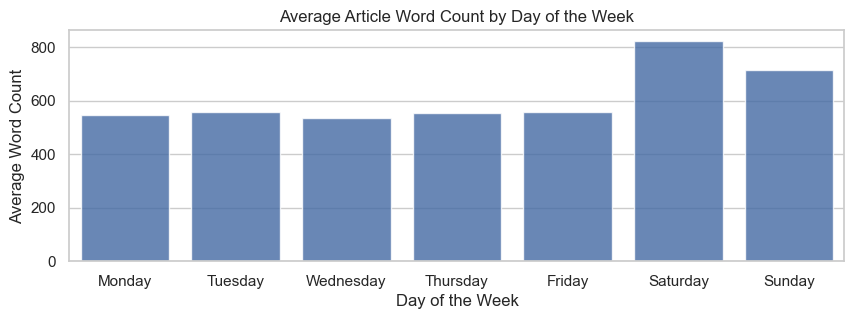

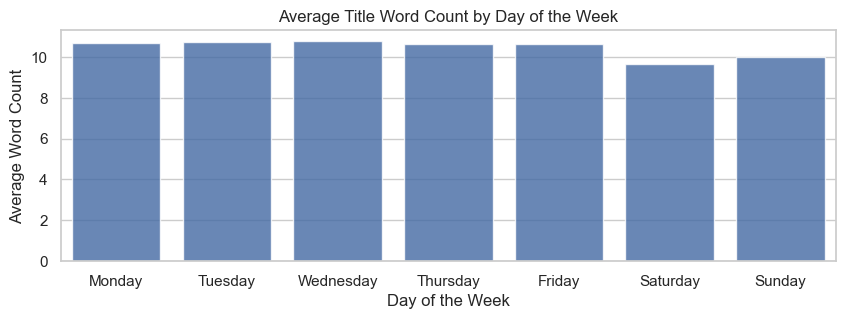

In [7]:

# Calculate average word count by day of the week for articles
avg_article_word_count_by_day = df_cleaned.groupby('day_of_week')['article_word_count'].mean().reindex(ordered_days)

# Plotting the average article word count by day of the week
plt.figure(figsize=(10, 3))
sns.barplot(x=avg_article_word_count_by_day.index, y=avg_article_word_count_by_day, color=(0.2, 0.4, 0.7), alpha=0.8).set(title='Average Article Word Count by Day of the Week', xlabel='Day of the Week', ylabel='Average Word Count')

plt.show()


# Calculate average word count by day of the week for titles
avg_title_word_count_by_day = df_cleaned.groupby('day_of_week')['title_word_count'].mean().reindex(ordered_days)

# Plotting the average title word count by day of the week
plt.figure(figsize=(10, 3))
sns.barplot(x=avg_title_word_count_by_day.index, y=avg_title_word_count_by_day, color=(0.2, 0.4, 0.7), alpha=0.8).set(title='Average Title Word Count by Day of the Week', xlabel='Day of the Week', ylabel='Average Word Count')

plt.show()


## Distribution of Articles by Source

Let's visualize the distribution of articles based on their sources.


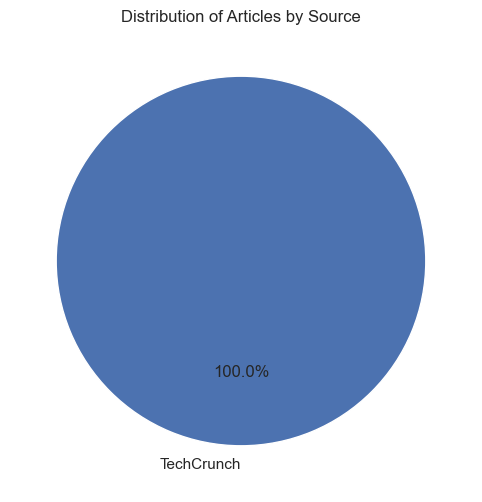

In [8]:

# Pie Chart for Article Sources
source_distribution = df_cleaned['source'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Articles by Source')
plt.show()
